In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Feature Selection Methods
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer
from sklearn.feature_selection import SelectKBest
from scipy.stats import zscore

In [58]:
# Load the dataset
file_path = 'StudentsPerformance.csv'
data = pd.read_csv(file_path)

In [79]:
#### 1. Identifying and Sourcing Relevant Datasets

# Display initial column names
print("Initial Columns in the Dataset:")
print(data.columns.tolist())
print()
print(data.dtypes)
print()

# Checking for irrelevant columns
irrelevant_cols = ['random_col1', 'random_col2', 'math score copy', 'reading score copy']

# Identify existing irrelevant columns
existing_irrelevant = [col for col in irrelevant_cols if col in data.columns]
print("\nIdentified Irrelevant Columns:", existing_irrelevant)

# Drop irrelevant columns
data.drop(columns=existing_irrelevant, inplace=True)
print("\nColumns after removing irrelevant data:")
print(data.columns.tolist())

Initial Columns in the Dataset:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object


Identified Irrelevant Columns: []

Columns after removing irrelevant data:
['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [ ]:
#### 2. Cleaning and Handling Missing Values

# Display initial missing values count
print("Initial Missing Values Count:\n")
print(data.isnull().sum())

Initial Missing Values Count:

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          20
test preparation course         0
math score                     30
reading score                  30
writing score                  30
dtype: int64


In [61]:
# Methods to Handle Missing Values

# 1. Dropping Missing Values
# Drop rows with any missing values
data_dropna = data.dropna()


In [63]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.584536,69.064948,67.998969
std,19.911907,14.328022,14.993726
min,0.000000,17.000000,10.000000
25%,57.750000,60.000000,58.000000
50%,67.000000,69.064948,68.000000
75%,76.250000,79.000000,78.000000
max,200.000000,100.000000,100.000000


In [65]:
# Methods to Handle Missing Values
# 2. Filling Missing Values with Mean (for numerical columns)
for col in ['math score', 'reading score', 'writing score']:
    data[col]=data[col].fillna(data[col].mean())
    print(f"Filled missing '{col}' with mean: {data[col].mean()}")
    


Filled missing 'math score' with mean: 67.58453608247423
Filled missing 'reading score' with mean: 69.06494845360825
Filled missing 'writing score' with mean: 67.99896907216495


In [67]:
# Methods to Handle Missing Values
# 3. Filling with Median (for numerical columns)
data_median = data.copy()
for col in ['math score', 'reading score', 'writing score']:
    data_median[col]=data_median[col].fillna(data_median[col].median())
    print(f"Filled missing '{col}' with median: {data_median[col].median()}")
    


Filled missing 'math score' with median: 67.0
Filled missing 'reading score' with median: 69.06494845360825
Filled missing 'writing score' with median: 68.0


In [68]:
# Methods to Handle Missing Values
# 4. Filling with Mode (for categorical columns)
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education']
for col in categorical_cols:
    data[col]=data[col].fillna(data[col].mode()[0])
    print(f"Mode with {col} in dataset: {data[col].mode()[0]}")




Mode with gender in dataset: female
Mode with race/ethnicity in dataset: group C
Mode with parental level of education in dataset: some college


In [69]:
# Methods to Handle Missing Values
# 5. Forward Fill Method
data.ffill(inplace=True)


In [70]:
# Methods to Handle Missing Values
# 6. Backward Fill Method
data.bfill(inplace=True)


In [71]:
# Methods to Handle Missing Values
# 7. Custom Value Imputation
data_custom = data.copy()
custom_fill_values = {
    'math score': 50,
    'reading score': 55,
    'writing score': 60
}
data_custom.fillna(custom_fill_values, inplace=True)


In [72]:
# Data after Handling Missing Values
print('\nData after Handling Missing Values:')
print(data.isnull().sum())




Data after Handling Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
#### 3. Feature Selection and Engineering
# Remove redundant columns
redundant_cols = ['math score copy', 'reading score copy']
data.drop(columns=redundant_cols, errors='ignore', inplace=True)

In [85]:
# Selecting top 2 features based on Chi-Square for categorical data
X = data.drop(['writing score'], axis=1)
y = data['writing score']

y = y.astype(int)
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Check for NaN values and handle them
if X.isnull().sum().sum() > 0:
    print("\nNaN values detected in X. Filling with column means.")
    X = X.fillna(X.mean())

if y.isnull().sum() > 0:
    print("\nNaN values detected in y. Filling with the median value.")
    y = y.fillna(y.median())

# Check for negative or zero values
for col in numeric_cols:
    # Ensure all values are positive for Chi-Square
    if (X[col] <= 0).any():
        # Apply minimum value shift to ensure all values are positive
        min_val = X[col].min()
        shift = abs(min_val) + 1 if min_val <= 0 else 0
        X[col] = X[col] + shift

# Apply Label Encoding for categorical features (if any)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Ensure all features are now numerical
print("\nData Types After Encoding and Shifting:")
print(X.dtypes)

# Discretize continuous numeric features (optional, but improves chi2 results)
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X[numeric_cols] = discretizer.fit_transform(X[numeric_cols])

# Verify the transformed data
print("\nData After Discretization:")
print(X.head())

# Select top 2 features using Chi-Square
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support(indices=True)]
print('\nTop 2 features based on Chi-Square:', selected_features)


Data Types After Encoding and Shifting:
gender                           int64
race/ethnicity                   int64
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                     float64
reading score                  float64
dtype: object

Data After Discretization:
   gender  race/ethnicity  parental level of education  lunch  \
0       1               2                            0      1   
1       1               1                            4      0   
2       2               3                            1      1   
3       2               2                            4      0   
4       2               4                            4      1   

   test preparation course  math score  reading score  
0                        2         1.0            3.0  
1                        1         1.0            2.0  
2                        2         1.0            2.0  
3                        2   

In [86]:
# Mutual Information for Categorical and Numerical Data
mutual_info = mutual_info_classif(X.select_dtypes(include=[np.number]), y)
mi_scores = pd.Series(mutual_info, index=X.select_dtypes(include=[np.number]).columns)
print('\nMutual Information Scores:\n', mi_scores)


Mutual Information Scores:
 gender                         0.237074
race/ethnicity                 0.107043
parental level of education    0.099413
lunch                          0.136661
test preparation course        0.217754
math score                     0.228276
reading score                  0.833543
dtype: float64


In [92]:
# Finding Average for Numerical Columns
numeric_cols = ['math score', 'reading score', 'writing score']
averages = data[numeric_cols].mean()
print('\nAverage Scores for Numerical Columns:\n', averages)

data['averages'] = data[numeric_cols].mean(axis=1)

# Assign 'Pass' or 'Fail' based on the average
data['result'] = data['averages'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

# Display the first few rows to verify
print(data[['averages', 'result']].head())


Average Scores for Numerical Columns:
 math score       67.584536
reading score    69.064948
writing score    67.998969
dtype: float64
    averages result
0  79.194845   Pass
1  68.861512   Pass
2  70.861512   Pass
3  72.528179   Pass
4  76.194845   Pass


In [ ]:
#### 4. Ensuring Data Integrity and Consistency

# Convert to lower case for categorical columns
for col in categorical_cols:
    data[col] = data[col].str.lower().str.strip()

# Title case for specific columns
data['race/ethnicity'] = data['race/ethnicity'].str.title()

# Handling negative scores by setting them to the minimum allowed score (0)
for col in numeric_cols:
    data[col] = data[col].apply(lambda x: max(x, 0))

# Checking for duplicate entries
print('\nNumber of Duplicate Entries:', data.duplicated().sum())

# Drop duplicates
data.drop_duplicates(inplace=True)

# Checking for invalid data ranges (e.g., scores exceeding 100)
for col in numeric_cols:
    if (data[col] > 100).any():
        print(f"Warning: {col} contains scores exceeding 100. Capping at 100.")
        data[col] = np.where(data[col] > 100, 100, data[col])

print('\nData after Ensuring Data Integrity and Consistency:')
print(data.head())


Number of Duplicate Entries: 0

Data after Ensuring Data Integrity and Consistency:
   gender race/ethnicity parental level of education         lunch  \
0  female        Group C          associate's degree      standard   
1  female        Group B                some college  free/reduced   
2    male        Group D           bachelor's degree      standard   
3    male        Group C                some college  free/reduced   
4    male        Group E                some college      standard   

  test preparation course  math score  reading score  writing score result  \
0                    none   67.584536           86.0           84.0   Pass   
1               completed   67.584536           66.0           73.0   Pass   
2                    none   67.584536           73.0           72.0   Pass   
3                    none   67.584536           77.0           73.0   Pass   
4               completed   67.584536           83.0           78.0   Pass   

    averages  
0  79.1948

In [ ]:
#### 5. Summary Statistics and Insights
print('\nSummary Statistics:')
print(data.describe())


Summary Statistics:
        math score  reading score  writing score     averages
count  1000.000000    1000.000000    1000.000000  1000.000000
mean     66.584536      69.064948      67.998969    68.216151
std      15.181803      14.328022      14.993726    14.519881
min       0.000000      17.000000      10.000000     9.000000
25%      57.750000      60.000000      58.000000    58.666667
50%      67.000000      69.064948      68.000000    68.666667
75%      76.250000      79.000000      78.000000    77.666667
max     100.000000     100.000000     100.000000   122.000000


In [96]:
print("\nSummary Statistics for Numerical Columns:")
print(data[numeric_cols + ['averages']].describe())

print("\nSummary Statistics for Categorical Columns:")
print(data[categorical_cols + ['result']].describe())



Summary Statistics for Numerical Columns:
        math score  reading score  writing score     averages
count  1000.000000    1000.000000    1000.000000  1000.000000
mean     66.584536      69.064948      67.998969    68.216151
std      15.181803      14.328022      14.993726    14.519881
min       0.000000      17.000000      10.000000     9.000000
25%      57.750000      60.000000      58.000000    58.666667
50%      67.000000      69.064948      68.000000    68.666667
75%      76.250000      79.000000      78.000000    77.666667
max     100.000000     100.000000     100.000000   122.000000

Summary Statistics for Categorical Columns:
        gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        Group C                some college  standard   
freq       524            319                         226       644   

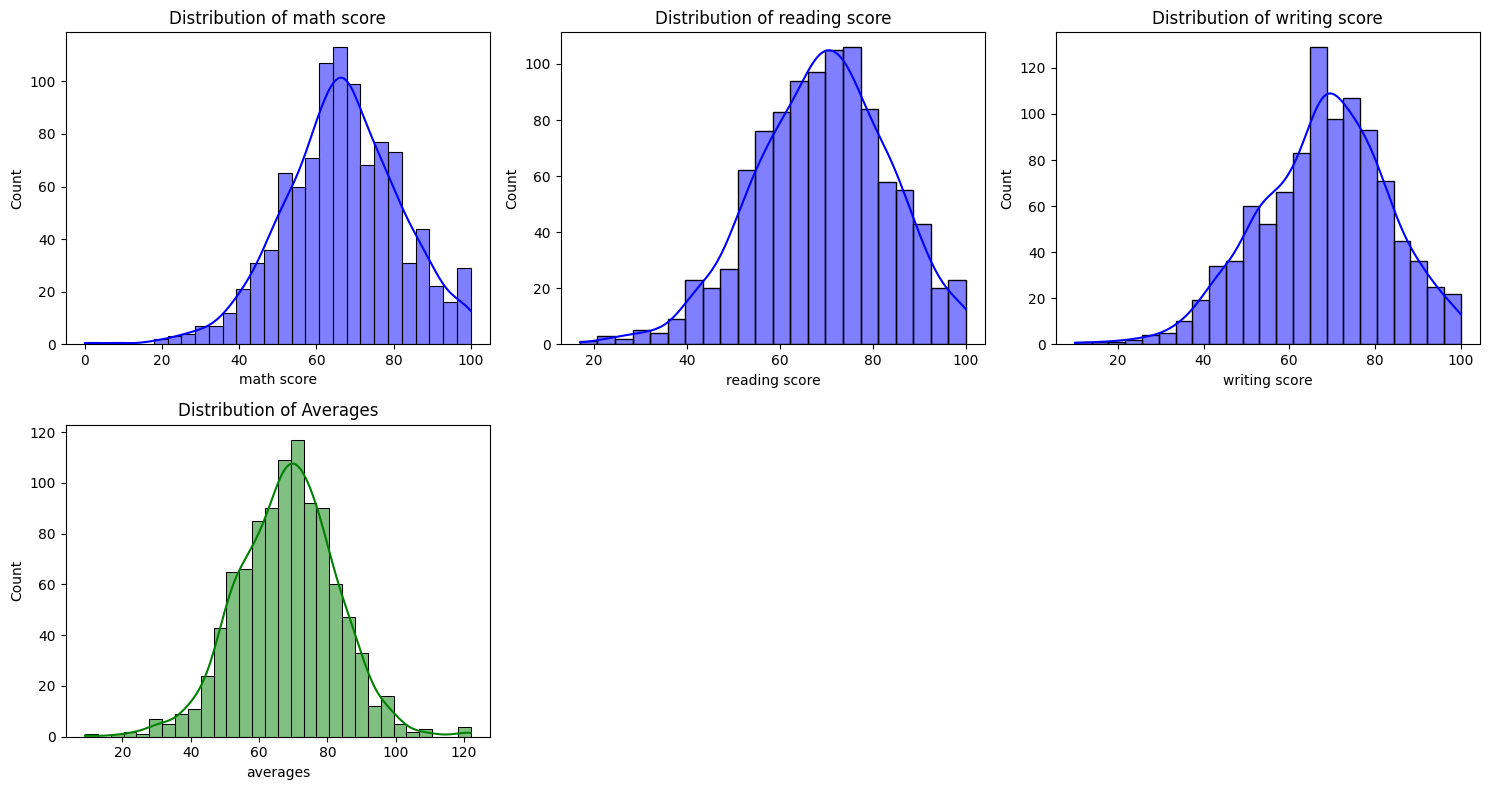

In [97]:
# Distribution of Numerical Data
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.subplot(2, 3, 4)
sns.histplot(data['averages'], kde=True, color='green')
plt.title('Distribution of Averages')
plt.tight_layout()
plt.show()

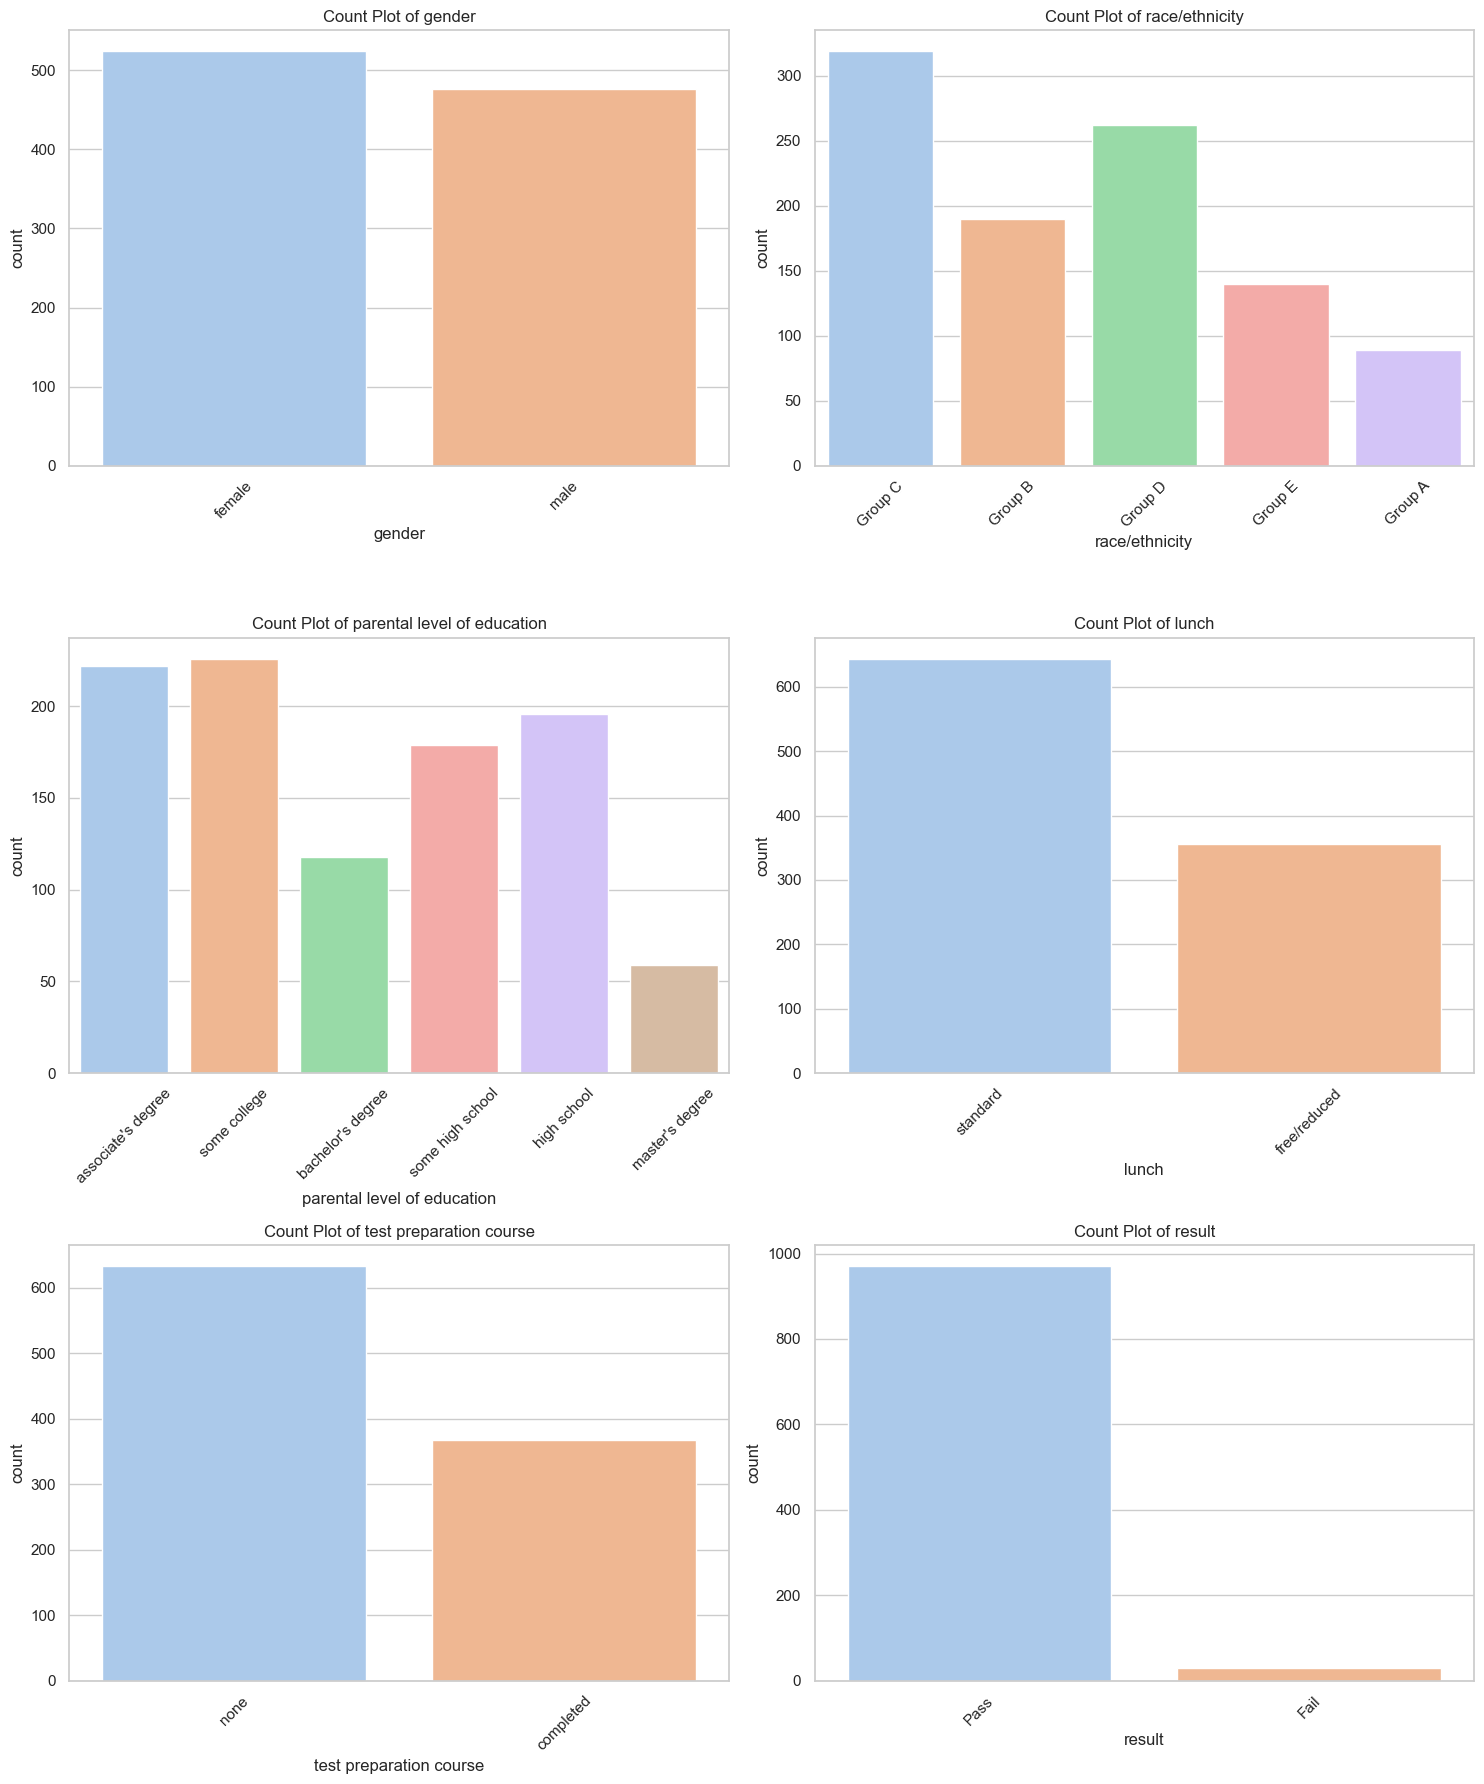

In [134]:
# Count Plot for Categorical Columns
cols = categorical_cols + ['result']
num_cols = len(cols)
rows = (num_cols // 2) + (num_cols) % 2
plt.figure(figsize=(15, 6 * rows))
for i, col in enumerate(categorical_cols + ['result']):
    plt.subplot(rows, 2, i+1)
    sns.countplot(x=col, data=data, hue=col, palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

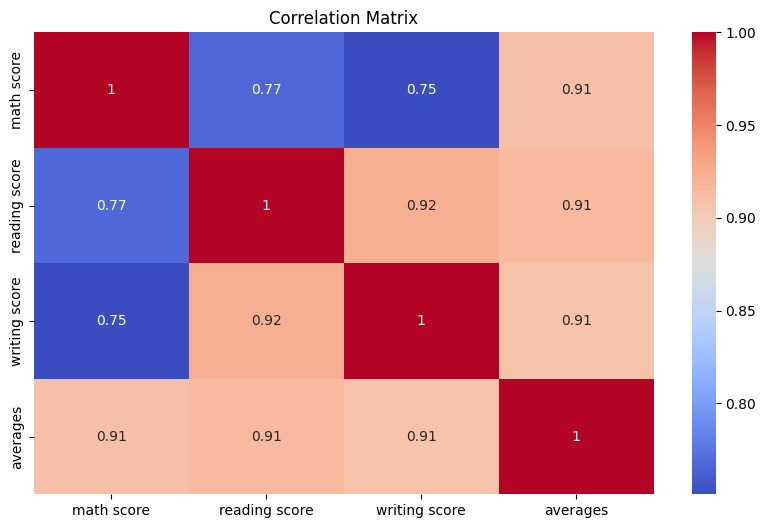

In [103]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = data[numeric_cols + ['averages']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [104]:
# Identifying Outliers using Z-Score
print("\nIdentifying Outliers using Z-Score:")
for col in numeric_cols:
    z_scores = zscore(data[col])
    outliers = data[np.abs(z_scores) > 3]
    print(f'\nNumber of Outliers in {col}: {len(outliers)}')
    print(outliers[[col]])


Identifying Outliers using Z-Score:

Number of Outliers in math score: 4
     math score
39          0.0
94         19.0
600        18.0
945         8.0

Number of Outliers in reading score: 5
     reading score
11            26.0
39            17.0
89            23.0
205           24.0
945           24.0

Number of Outliers in writing score: 5
     writing score
11            22.0
39            10.0
89            19.0
205           15.0
945           23.0


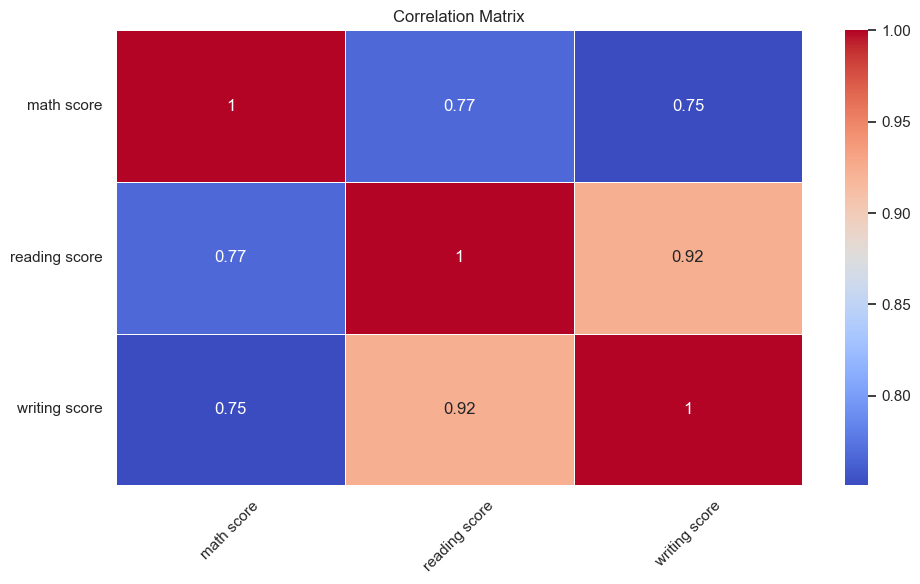

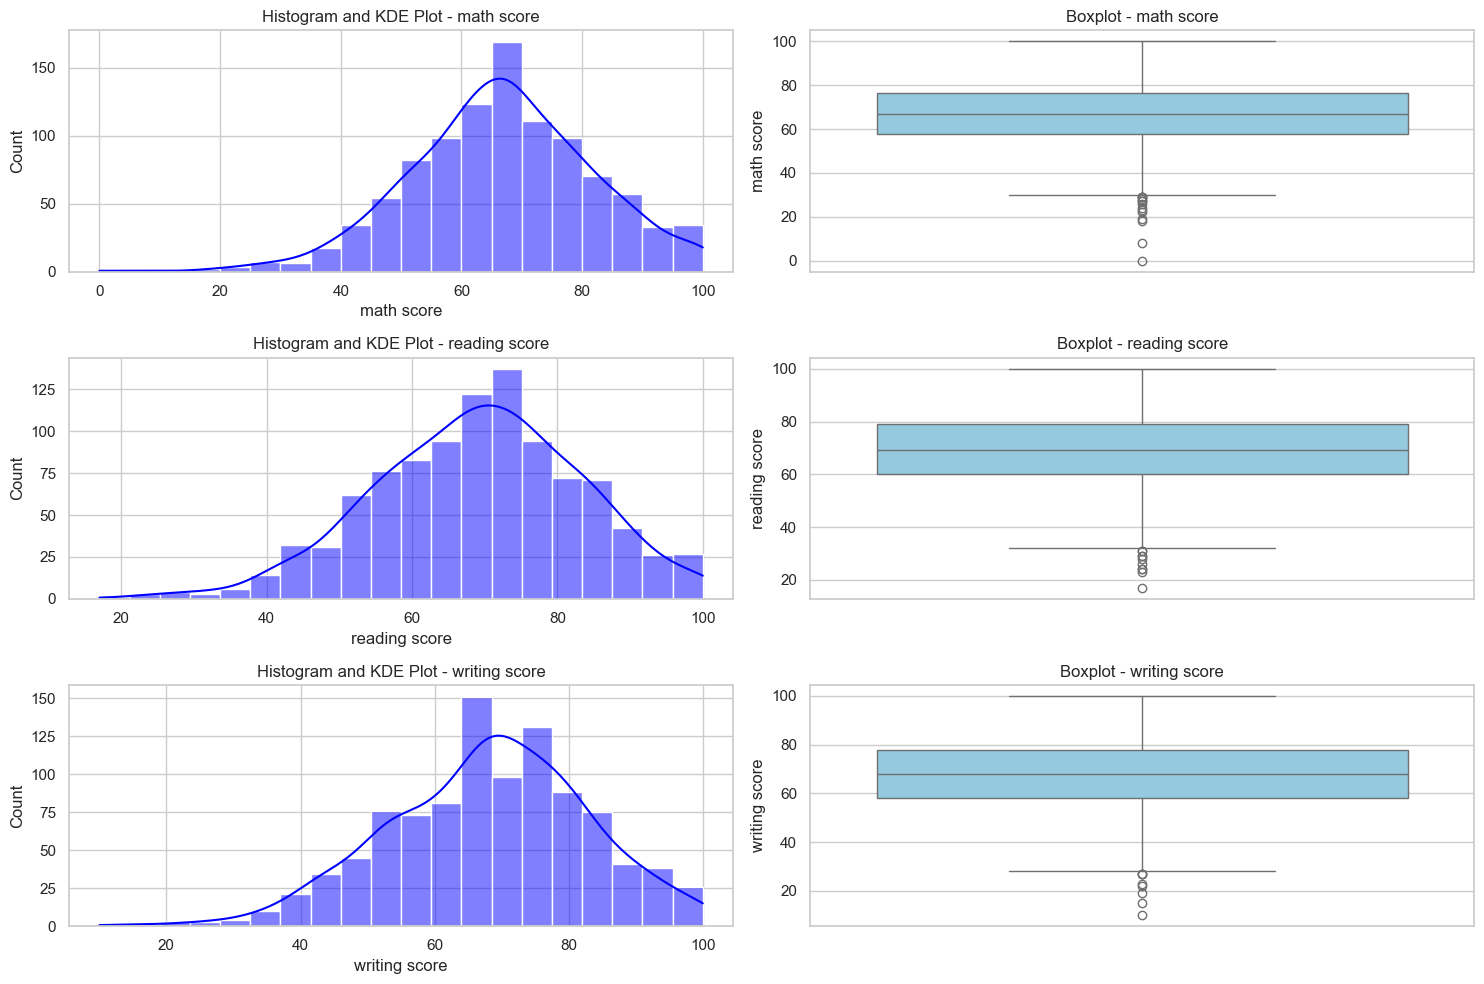

<Figure size 1500x1000 with 0 Axes>

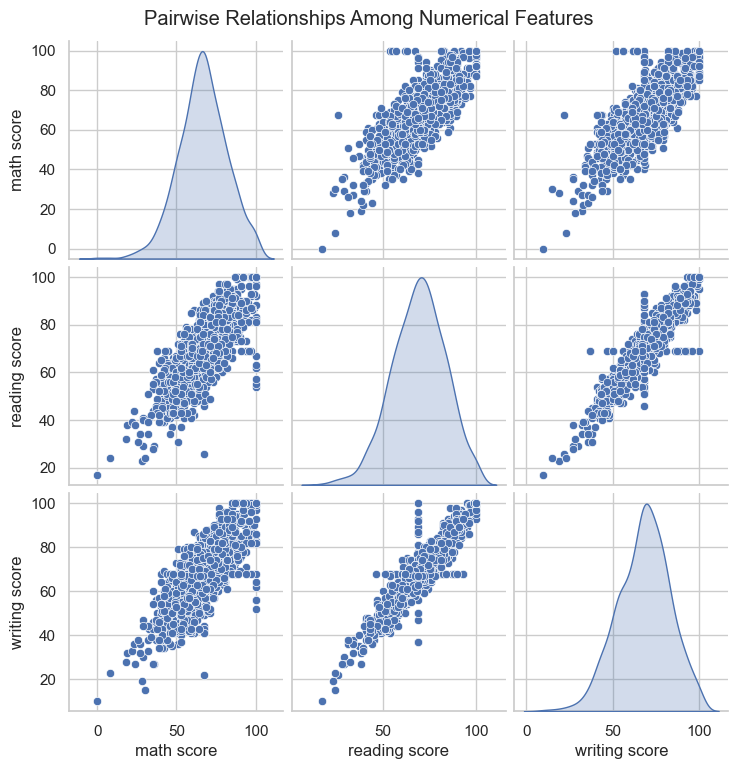

In [129]:
#### 6. Identifying Patterns, Trends, and Anomalies

numeric_cols = ['math score', 'reading score', 'writing score']

# Correlation Analysis
if len(numeric_cols) > 0:
    # Correlation Analysis
    plt.figure(figsize=(10, 6))
    correlation_matrix = data[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("No numerical columns found for correlation analysis.")

# Distribution Analysis - Histograms and KDE Plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i * 2 + 1)
    sns.histplot(data[col], kde=True, color='blue', bins=20)
    plt.title(f'Histogram and KDE Plot - {col}')
    
    plt.subplot(3, 2, i * 2 + 2)
    sns.boxplot(y=data[col], color='skyblue')
    plt.title(f'Boxplot - {col}')

plt.tight_layout()
plt.show()

# Scatter Plots for Pairwise Relationships
plt.figure(figsize=(15, 10))
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.suptitle('Pairwise Relationships Among Numerical Features', y=1.02)
plt.show()

In [110]:
# Detecting Outliers using Z-Score

# Create a copy for outlier analysis
data_zscore = data.copy()

for col in numeric_cols:
    data[f'{col}_zscore'] = zscore(data[col])

# Displaying outliers based on Z-score
outliers = data[(data['math score_zscore'].abs() > 3) | 
                (data['reading score_zscore'].abs() > 3) | 
                (data['writing score_zscore'].abs() > 3)]

print("\nOutliers Detected Based on Z-score:")
print(outliers[['math score', 'reading score', 'writing score']])

# Remove Z-score columns after analysis
data.drop([f'{col}_zscore' for col in numeric_cols], axis=1, inplace=True)




Outliers Detected Based on Z-score:
     math score  reading score  writing score
11    67.584536           26.0           22.0
39     0.000000           17.0           10.0
89    28.000000           23.0           19.0
94    19.000000           38.0           32.0
205   30.000000           24.0           15.0
600   18.000000           32.0           28.0
945    8.000000           24.0           23.0


In [ ]:
#### 7. Handling Outliers and Data Transformations

data_outliers = data.copy()

# List of numeric columns to analyze
numeric_cols = data_outliers.select_dtypes(include=[np.number]).columns.tolist()

In [112]:
# Z-Score Method
# Detect outliers using Z-Score
outlier_threshold = 3
for col in numeric_cols:
    data_outliers[f'{col}_zscore'] = zscore(data_outliers[col])

# Identifying outliers
outliers_zscore = data_outliers[
    (data_outliers[[f'{col}_zscore' for col in numeric_cols]].abs() > outlier_threshold).any(axis=1)
]
print("\nOutliers Detected Using Z-Score Method:")
print(outliers_zscore[numeric_cols])

# Drop Z-Score columns after analysis
data_outliers.drop([f'{col}_zscore' for col in numeric_cols], axis=1, inplace=True)


Outliers Detected Using Z-Score Method:
     math score  reading score  writing score    averages
11    67.584536           26.0      22.000000   38.528179
39     0.000000           17.0      10.000000    9.000000
89    28.000000           23.0      19.000000   23.333333
94    19.000000           38.0      32.000000   29.666667
201  100.000000           83.0      83.000000  122.000000
205   30.000000           24.0      15.000000   23.000000
295  100.000000           88.0      67.998969  118.666323
430  100.000000           82.0      82.000000  121.333333
600   18.000000           32.0      28.000000   26.000000
818  100.000000           81.0      82.000000  121.000000
945    8.000000           24.0      23.000000   18.333333


In [113]:
# IQR Method
# Define the lower and upper bounds for each numeric column
for col in numeric_cols:
    Q1 = data_outliers[col].quantile(0.25)
    Q3 = data_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_iqr = data_outliers[(data_outliers[col] < lower_bound) | (data_outliers[col] > upper_bound)]
    
    # Handling Outliers - Option 1: Capping the Outliers
    data_outliers[col] = np.where(data_outliers[col] < lower_bound, lower_bound, data_outliers[col])
    data_outliers[col] = np.where(data_outliers[col] > upper_bound, upper_bound, data_outliers[col])

    print(f"\nOutliers in {col} using IQR Method:\n", outliers_iqr[col])


Outliers in math score using IQR Method:
 39      0.0
47     29.0
89     28.0
94     19.0
110    29.0
175    27.0
381    22.0
407    24.0
600    18.0
768    23.0
842    29.0
927    27.0
945     8.0
989    26.0
Name: math score, dtype: float64

Outliers in reading score using IQR Method:
 11     26.0
39     17.0
47     29.0
89     23.0
146    31.0
205    24.0
224    29.0
284    28.0
945    24.0
989    31.0
Name: reading score, dtype: float64

Outliers in writing score using IQR Method:
 11     22.0
39     10.0
89     19.0
205    15.0
224    27.0
284    27.0
407    27.0
945    23.0
Name: writing score, dtype: float64

Outliers in averages using IQR Method:
 39       9.000000
47      29.333333
89      23.333333
94      29.666667
201    122.000000
205     23.000000
284     30.000000
295    118.666323
337    110.333333
367    108.000000
407     29.666667
430    121.333333
600     26.000000
648    109.000000
818    121.000000
945     18.333333
Name: averages, dtype: float64


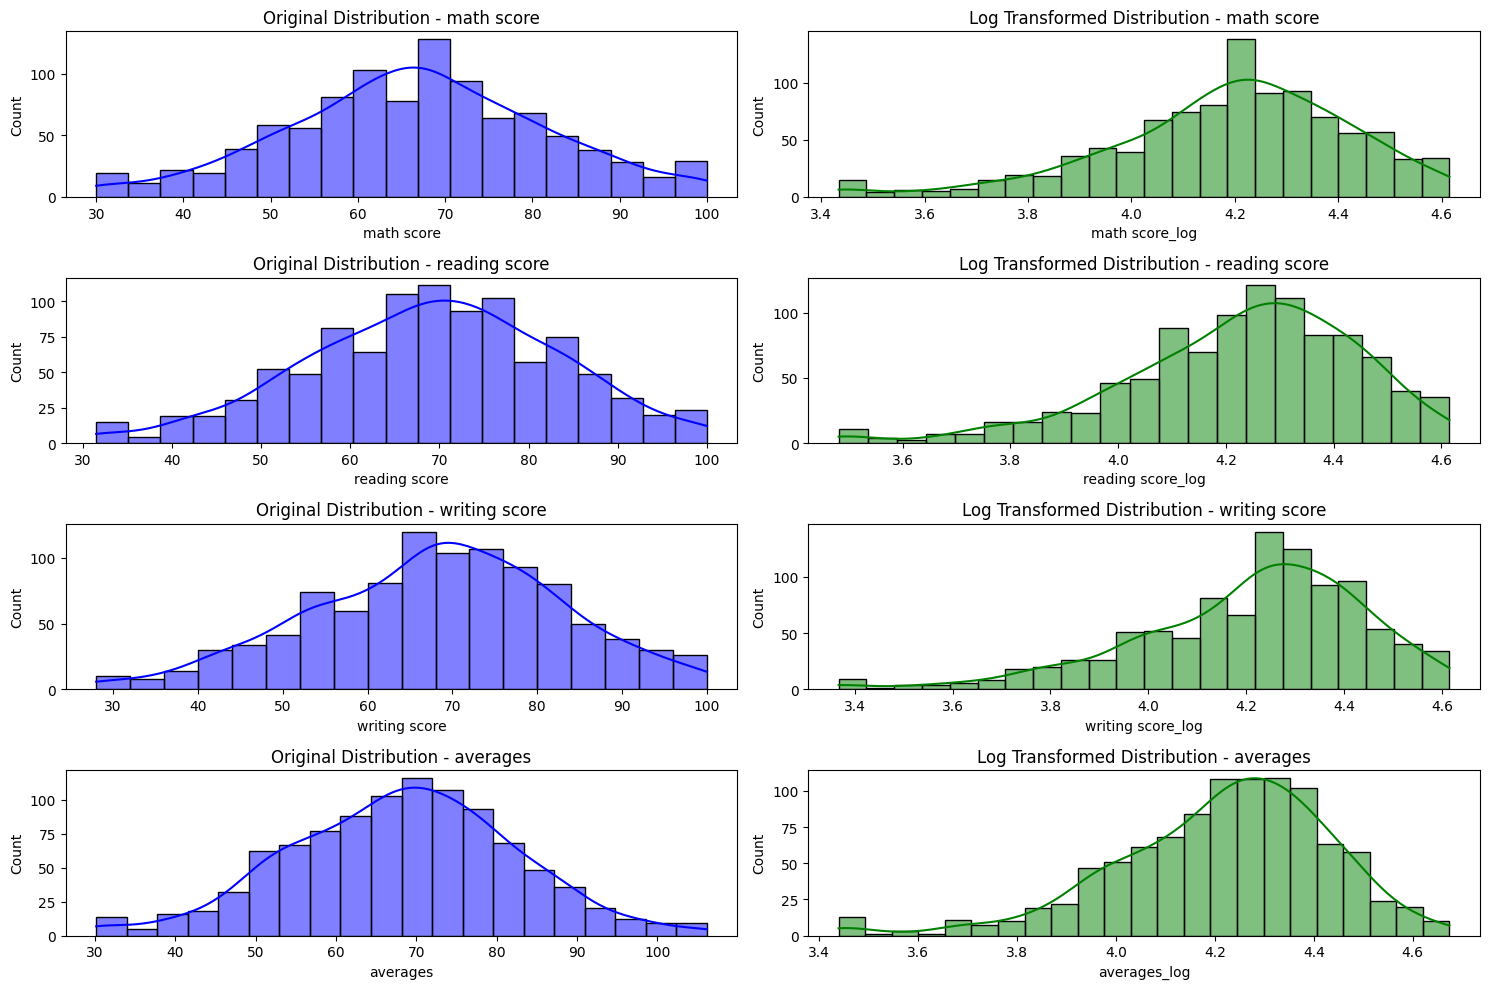

In [114]:
# Data Transformation - Log Transformation
# Applying log transformation to reduce skewness
# Handling zeros and negative values by adding a small constant
data_transformed = data_outliers.copy()

for col in numeric_cols:
    # Add a small constant to avoid log(0) issues
    data_transformed[f'{col}_log'] = np.log(data_outliers[col] + 1)

# Plotting the original vs. transformed data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 2, i * 2 + 1)
    sns.histplot(data_outliers[col], kde=True, color='blue')
    plt.title(f'Original Distribution - {col}')
    
    plt.subplot(len(numeric_cols), 2, i * 2 + 2)
    sns.histplot(data_transformed[f'{col}_log'], kde=True, color='green')
    plt.title(f'Log Transformed Distribution - {col}')

plt.tight_layout()
plt.show()

In [ ]:
#### 8. Initial Visual Representation of Key Findings

# Set style for plots
sns.set(style='whitegrid')

# Numerical Columns
numeric_cols = ['math score', 'reading score', 'writing score']

# Categorical Columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

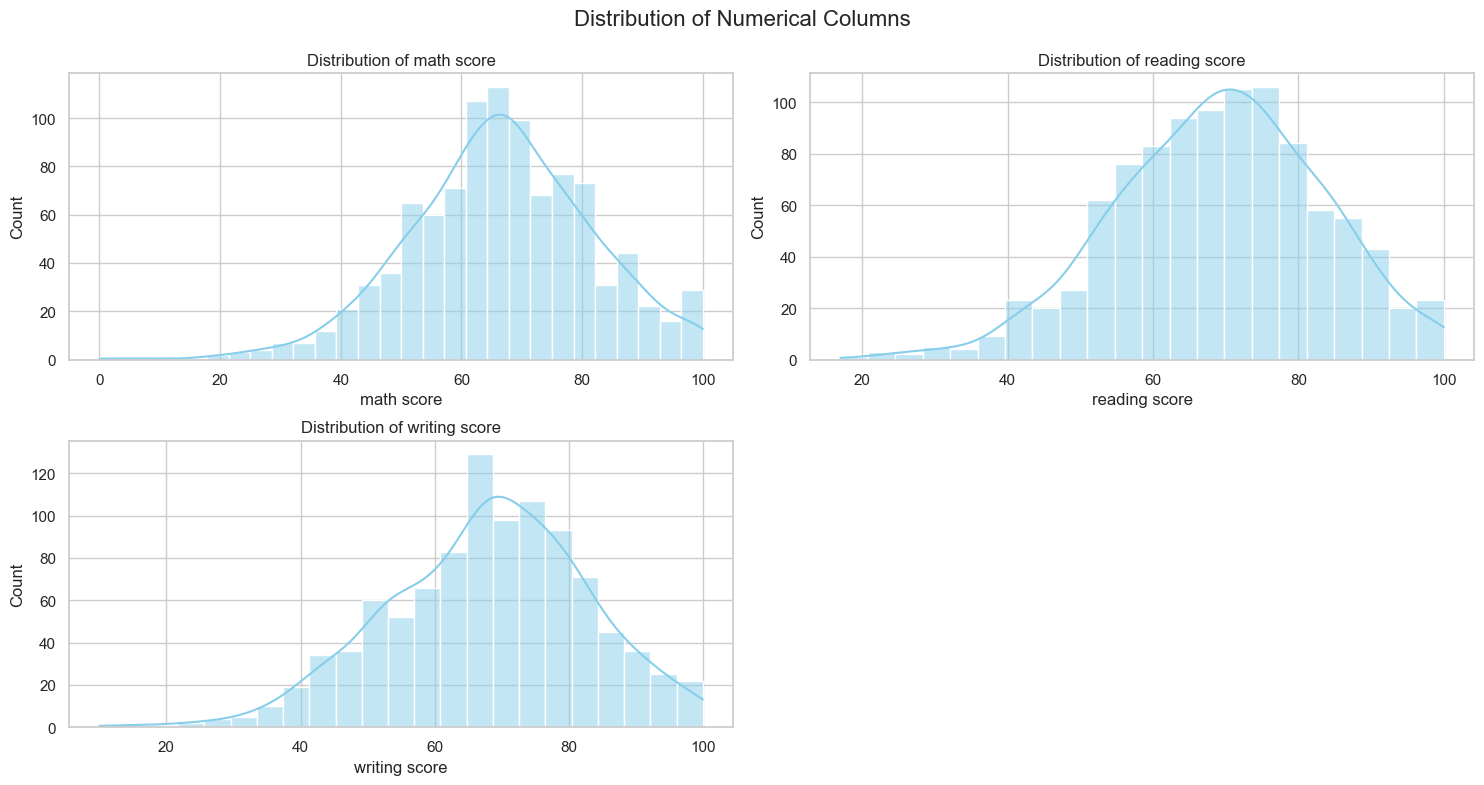

In [136]:
# 1. Distribution Plots for Numerical Columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

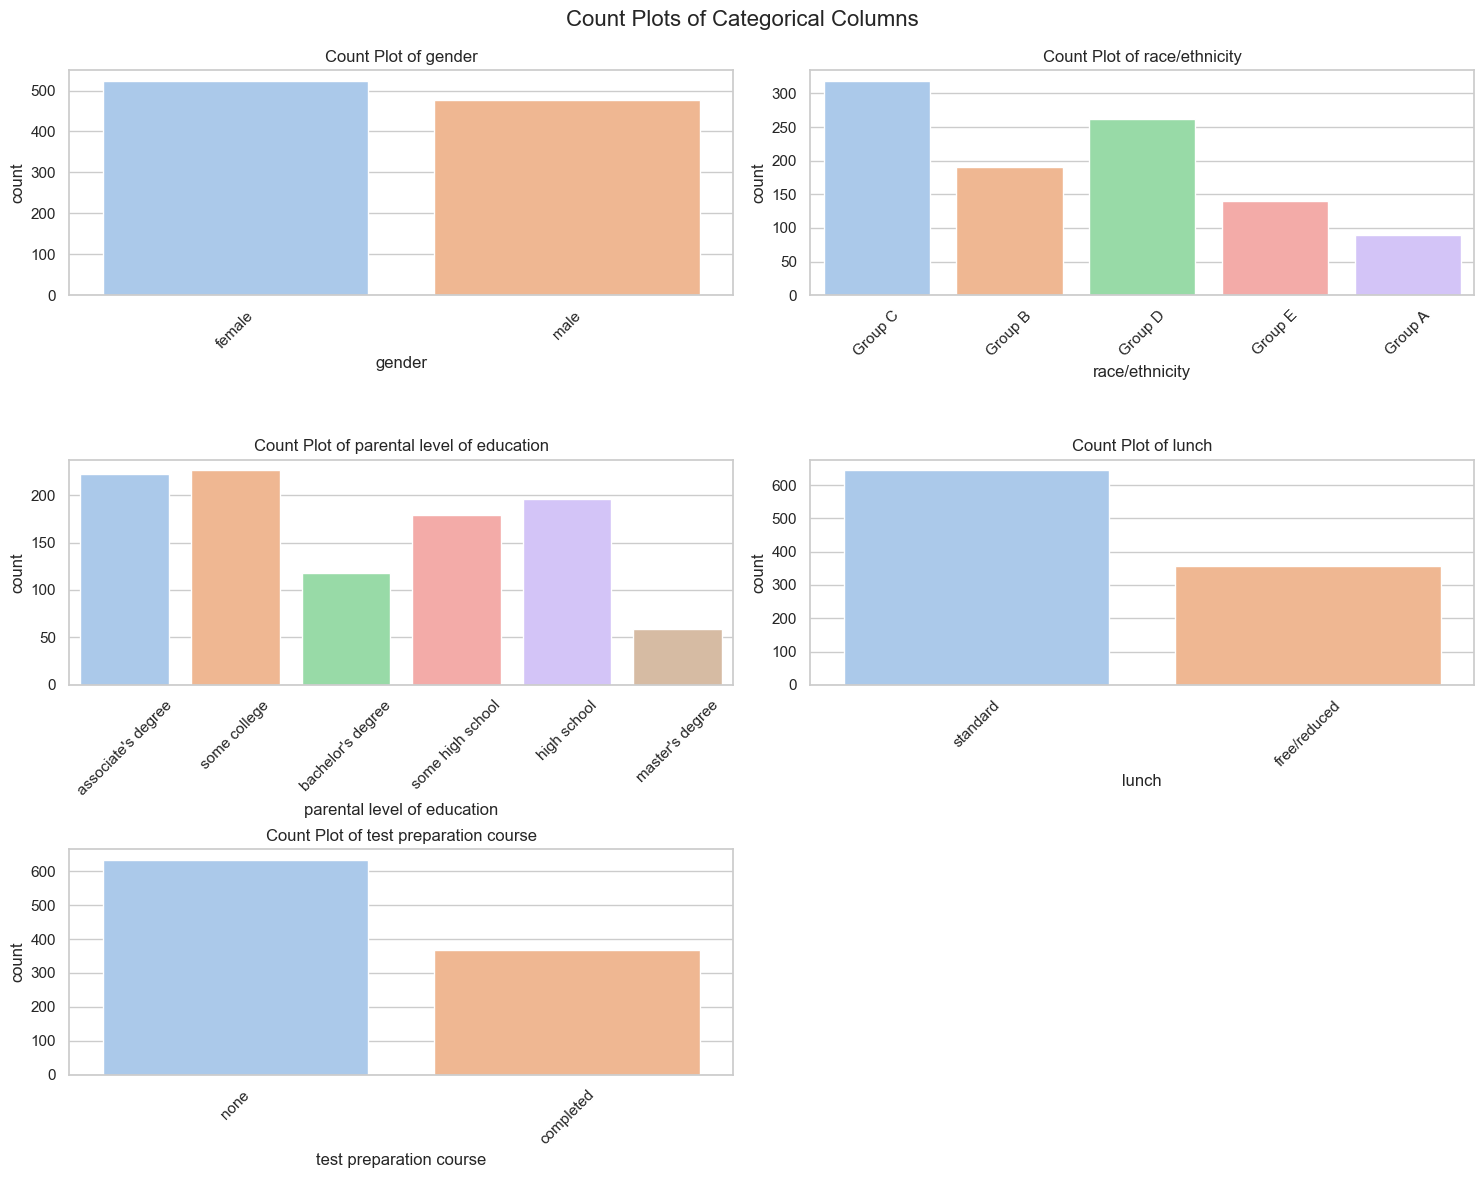

In [125]:
# 2. Count Plots for Categorical Columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=data, hue=col, palette='pastel')
    plt.xticks(rotation=45)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.suptitle('Count Plots of Categorical Columns', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

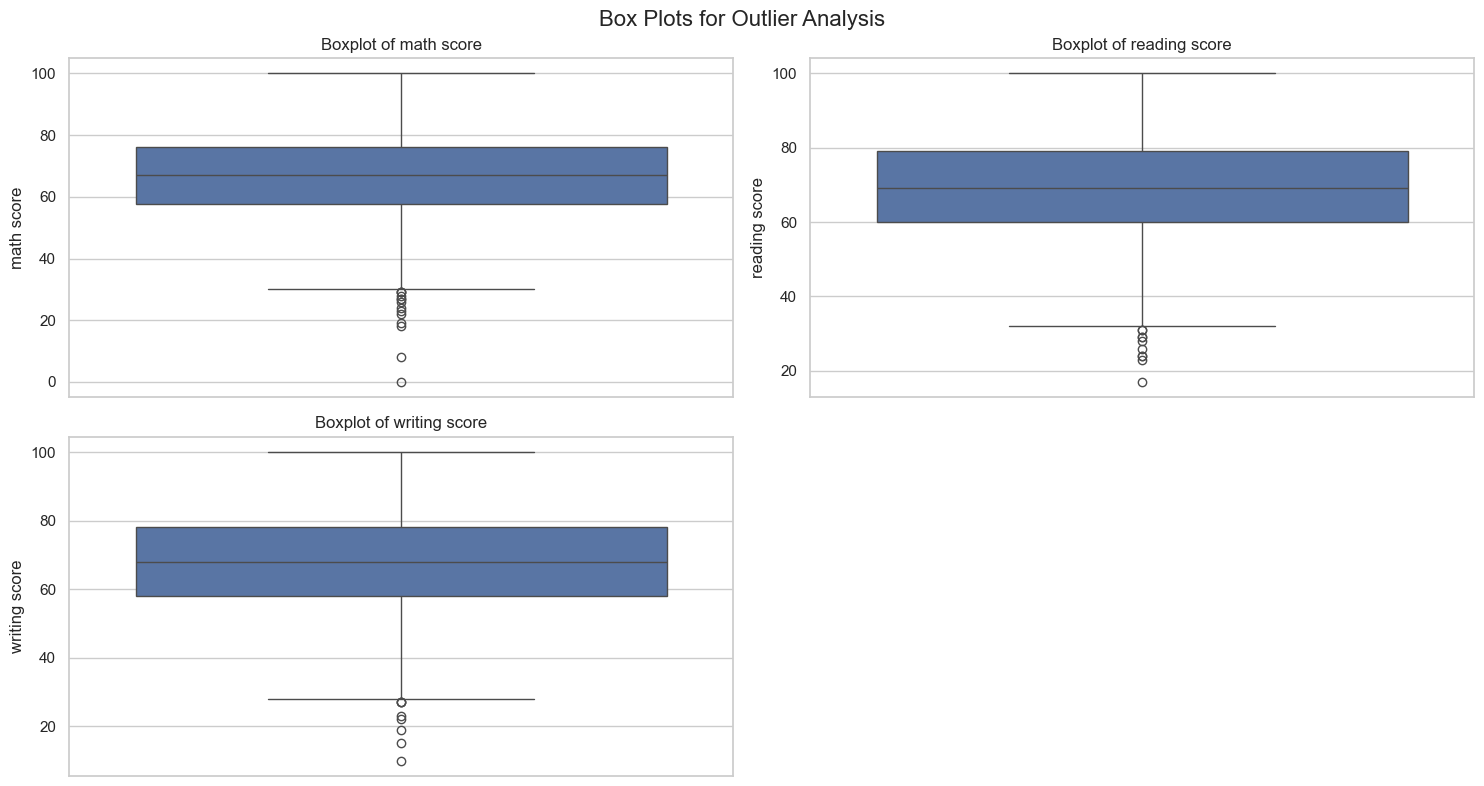

In [128]:
# 3. Box Plots for Outlier Analysis
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Box Plots for Outlier Analysis', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

<Figure size 1200x1000 with 0 Axes>

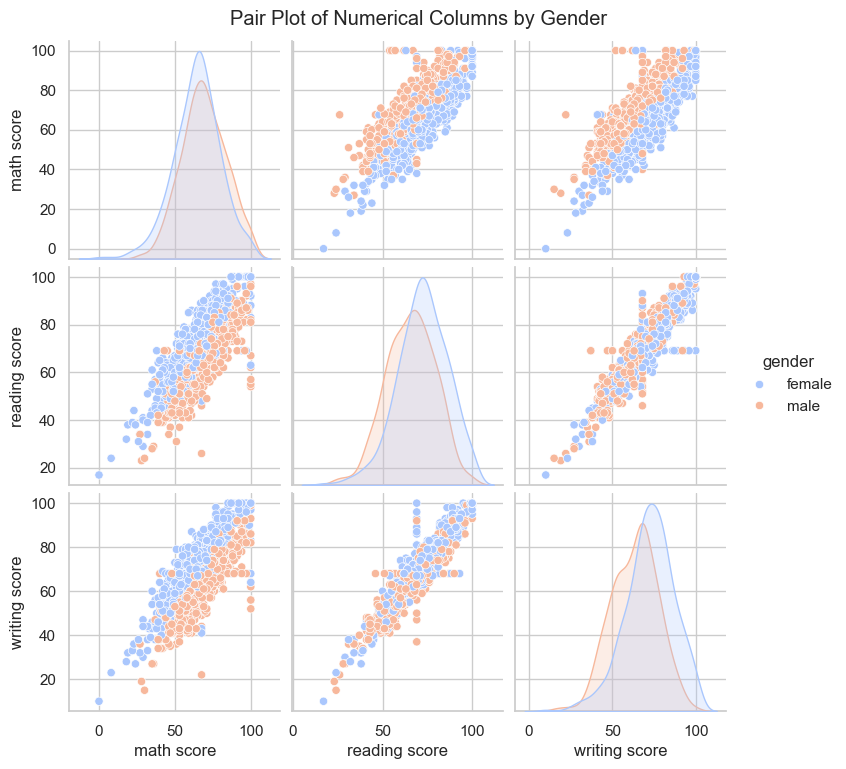

In [119]:
# 4. Pair Plot to Explore Relationships
plt.figure(figsize=(12, 10))
sns.pairplot(data[numeric_cols + ['gender']], hue='gender', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Columns by Gender', y=1.02)
plt.show()

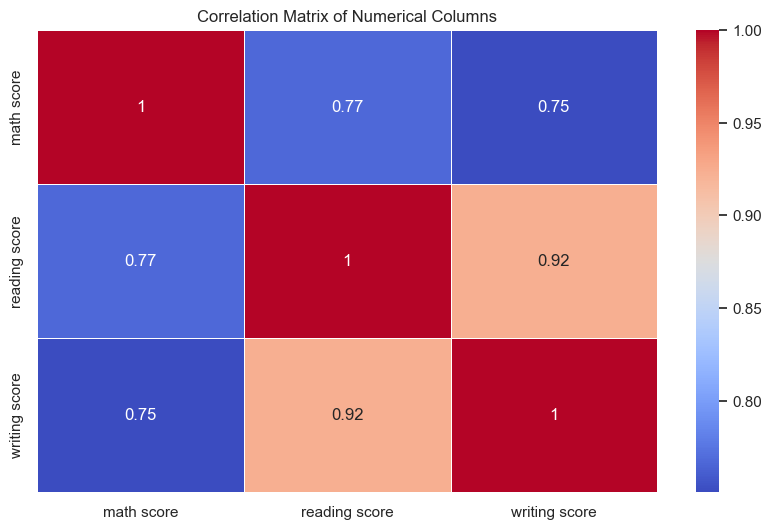

In [120]:
# 5. Heatmap for Correlation Analysis
plt.figure(figsize=(10, 6))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

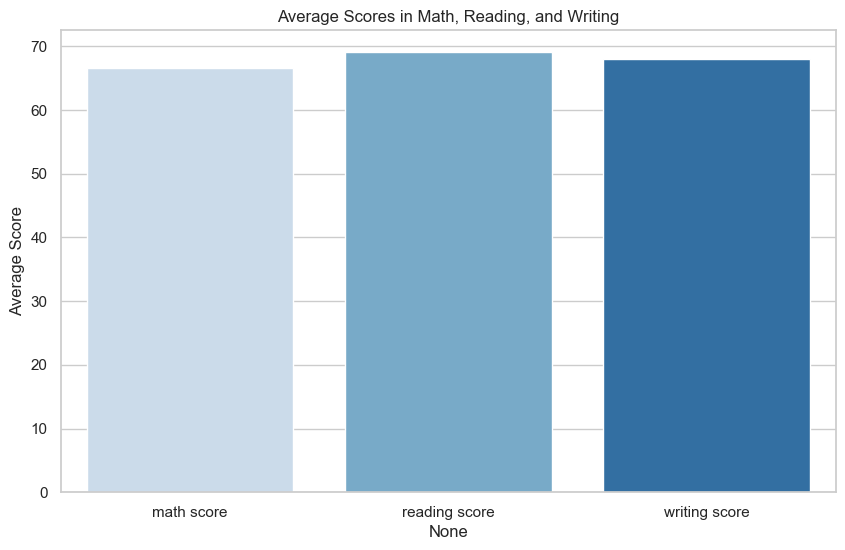

In [139]:
# 6. Bar Plot for Average Scores

average_scores = data[numeric_cols].mean()
plt.figure(figsize=(10, 6))

sns.barplot(
    x=average_scores.index, 
    y=average_scores.values, 
    hue=average_scores.index,        # Assign hue same as x for different colors
    palette='Blues',                 # Palette for colors
    dodge=False,                    # No dodging since it's single bars
    legend=False                    # Hide the legend
)

plt.title('Average Scores in Math, Reading, and Writing')
plt.ylabel('Average Score')
plt.show()

In [141]:
# Save the dataset with outlier handling and transformation

output_path = 'StudentsPerformance_Cleaned_Updated.csv'
data_transformed.to_csv(output_path, index=False)

print(f"Dataset after applying  all above 8 points highlighted with \'####\' saved as: {output_path} ")

Dataset after applying  all above 8 points highlighted with '####' saved as: StudentsPerformance_Cleaned_Updated.csv 
